In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10

#https://stackoverflow.com/questions/69687794/unable-to-manually-load-cifar10-dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

In [4]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

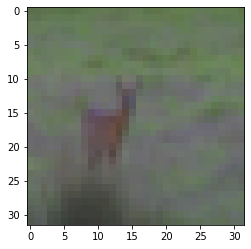

In [5]:
plt.imshow(train_data[420])

In [6]:
#classes_cifar10 = np.array(["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])
#len(classes_cifar10)

classes_cifar10={
    "airplane": 0,
    "truck": 1,
    "bird" : 2, 
    "cat" : 3, 
    "deer" : 4, 
    "dog" : 5, 
    "frog" : 6, 
    "horse" : 7, 
    "ship" : 8, 
    "truck" : 9
}

len(classes_cifar10)

9

In [7]:
train_data_norm = tf.constant(train_data/(train_data.max()), dtype="float32")
test_data_norm = tf.constant(test_data/(test_data.max()), dtype="float32")
train_labels_oneHot = tf.one_hot(train_labels, depth=len(classes_cifar10))
test_labels_oneHot = tf.one_hot(test_labels, depth=len(classes_cifar10))

train_data_norm.shape, train_labels_oneHot.shape

(TensorShape([50000, 32, 32, 3]), TensorShape([50000, 1, 9]))

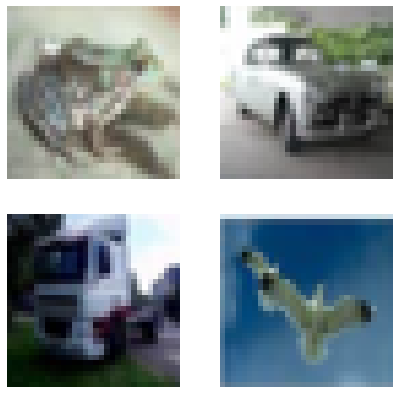

In [8]:
import random

plt.figure(figsize=(7,7))

for i in range(4):
  ax=plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  #plt.title(classes_cifar10(rand_index))
  plt.axis(False)

In [ ]:
#create the model

epoch = 40
tf.random.set_seed(42)

myModel = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(32,32,3)),
                               tf.keras.layers.Dense(128, activation="relu"),
                               tf.keras.layers.Dense(64, activation="relu"),
                               tf.keras.layers.Dense(32, activation="relu"),
                               tf.keras.layers.Dense(10, activation="softmax")
])

#compile the model
myModel.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


#create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#fit the model
myModel_history = myModel.fit(train_data, 
                              train_labels, 
                              epochs=epoch,
                              callbacks=[lr_scheduler])

Epoch 1/40
1563/1563 [==============================] - 63s 40ms/step - loss: 8.4959 - accuracy: 0.21840s - loss: 8.560
Epoch 2/40
1563/1563 [==============================] - 59s 38ms/step - loss: 2.1413 - accuracy: 0.2687
Epoch 3/40
1563/1563 [==============================] - 58s 37ms/step - loss: 2.1541 - accuracy: 0.23871s - los
Epoch 4/40
1563/1563 [==============================] - 61s 39ms/step - loss: 2.1356 - accuracy: 0.1758
Epoch 5/40
1563/1563 [==============================] - 55s 35ms/step - loss: 2.1923 - accuracy: 0.1548
Epoch 6/40
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3033 - accuracy: 0.0996
Epoch 7/40
1563/1563 [==============================] - 57s 36ms/step - loss: 2.3057 - accuracy: 0.1008
Epoch 8/40
 102/1563 [>.............................] - ETA: 55s - loss: 2.3027 - accuracy: 0.1051

In [ ]:
lrs = 1e-3 * (10 **(tf.range(epoch)/20))
plt.semilogx(lrs, myModel_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")